Adapted from: https://towardsdatascience.com/umap-variance-explained-b0eacb5b0801

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
labels = mnist.target.astype(int)
print(mnist.data.shape)
#(70000, 784)



(70000, 784)


In [2]:
d = mnist.data.to_numpy()

In [3]:
mnist.data

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

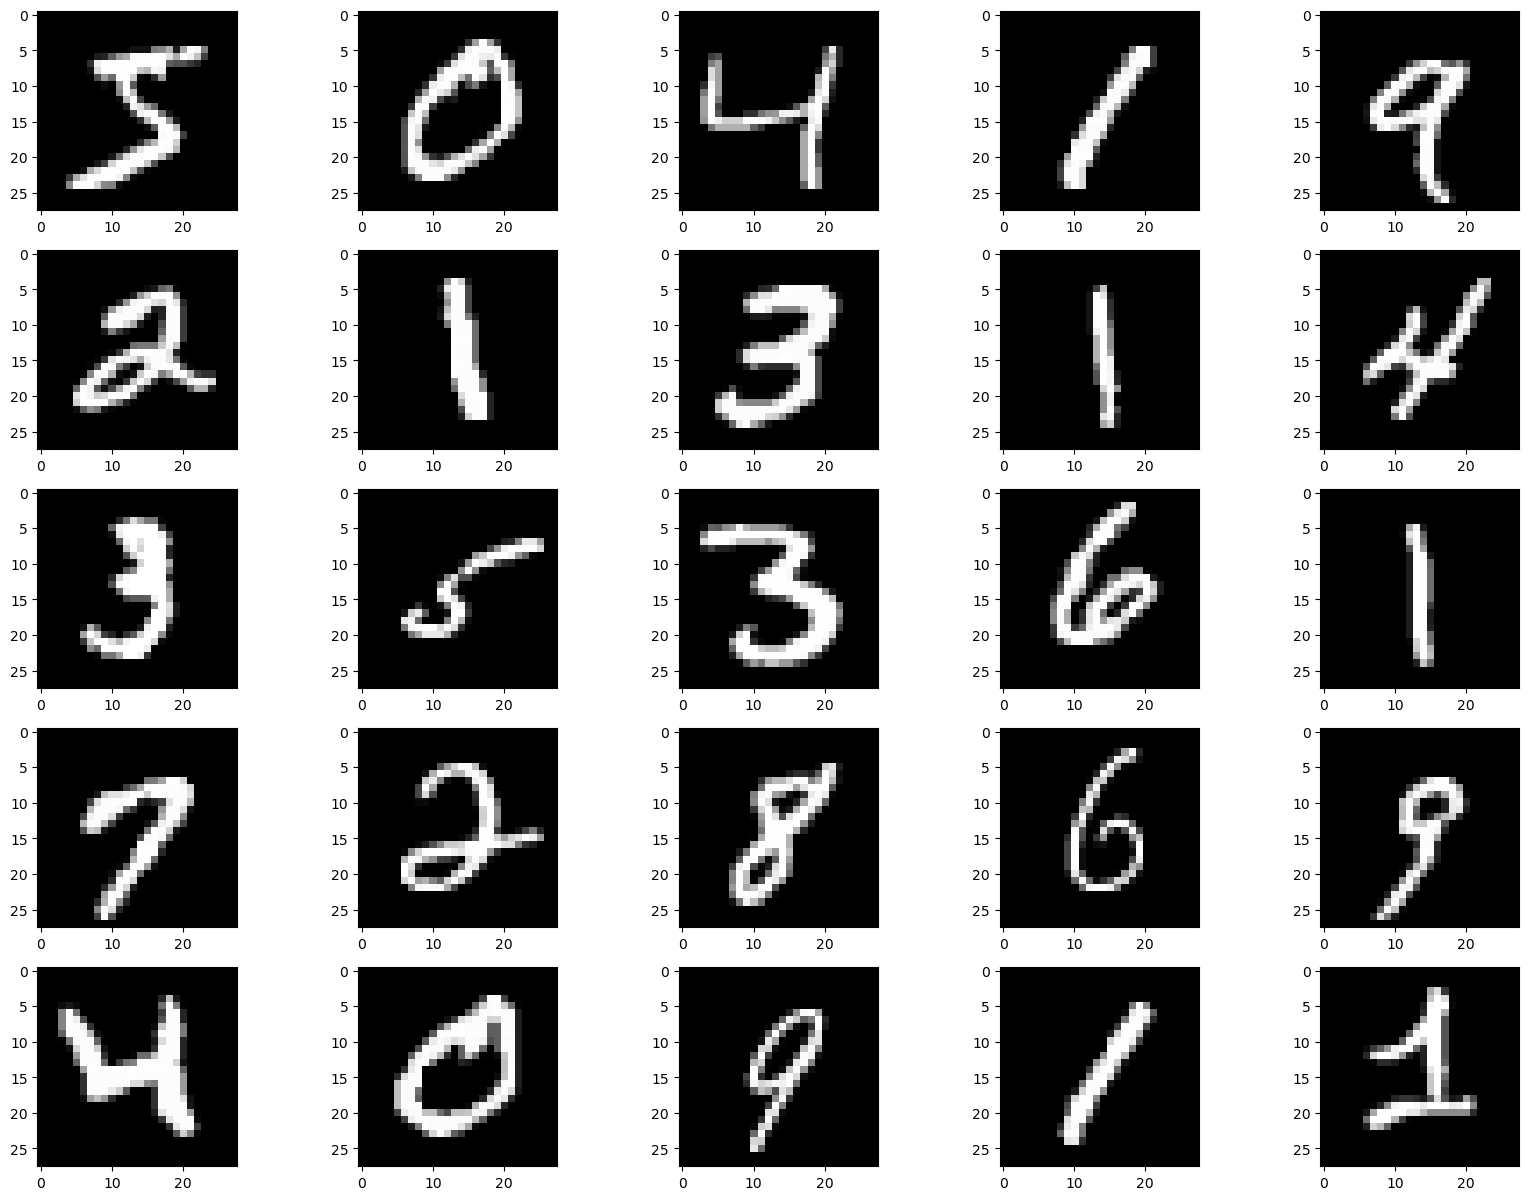

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20, 15))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(d[i].reshape(28,28), cmap = plt.get_cmap('gray'))

plt.show()

In [5]:
import numpy as np

N_points = 10000

X = np.log10(d + 1)
#X = mnist.data / 255

np.random.seed(123)
random_indices = np.random.choice(X.shape[0], size=N_points, replace=False)
X = X[random_indices,:]
labels = labels[random_indices]

In [6]:
labels

21971    0
16953    9
48447    4
42344    9
4376     5
        ..
30718    7
30971    6
14709    5
7016     9
32363    7
Name: class, Length: 10000, dtype: int64

Observed variance explained:
[0.11043074 0.07698788 0.06564009 0.05835455 0.04983201 0.04556471
 0.03336833 0.02898735 0.02736869 0.02373547]


Finished 1 permutations
Finished 2 permutations
Finished 3 permutations
Finished 4 permutations
Finished 5 permutations
Finished 6 permutations
Finished 7 permutations
Finished 8 permutations
Finished 9 permutations
Finished 10 permutations

Permuted variance explained:
[0.002110495223776359, 0.002082817353131103, 0.0020737835173461694, 0.002068181537076531, 0.00205940726907657, 0.0020541773956727345, 0.002044391263394531, 0.0020402233529449227, 0.0020368949440908207, 0.0020312493727298597]

Number of significant Principal Components: 62
Together they explain 86% of variation in the data


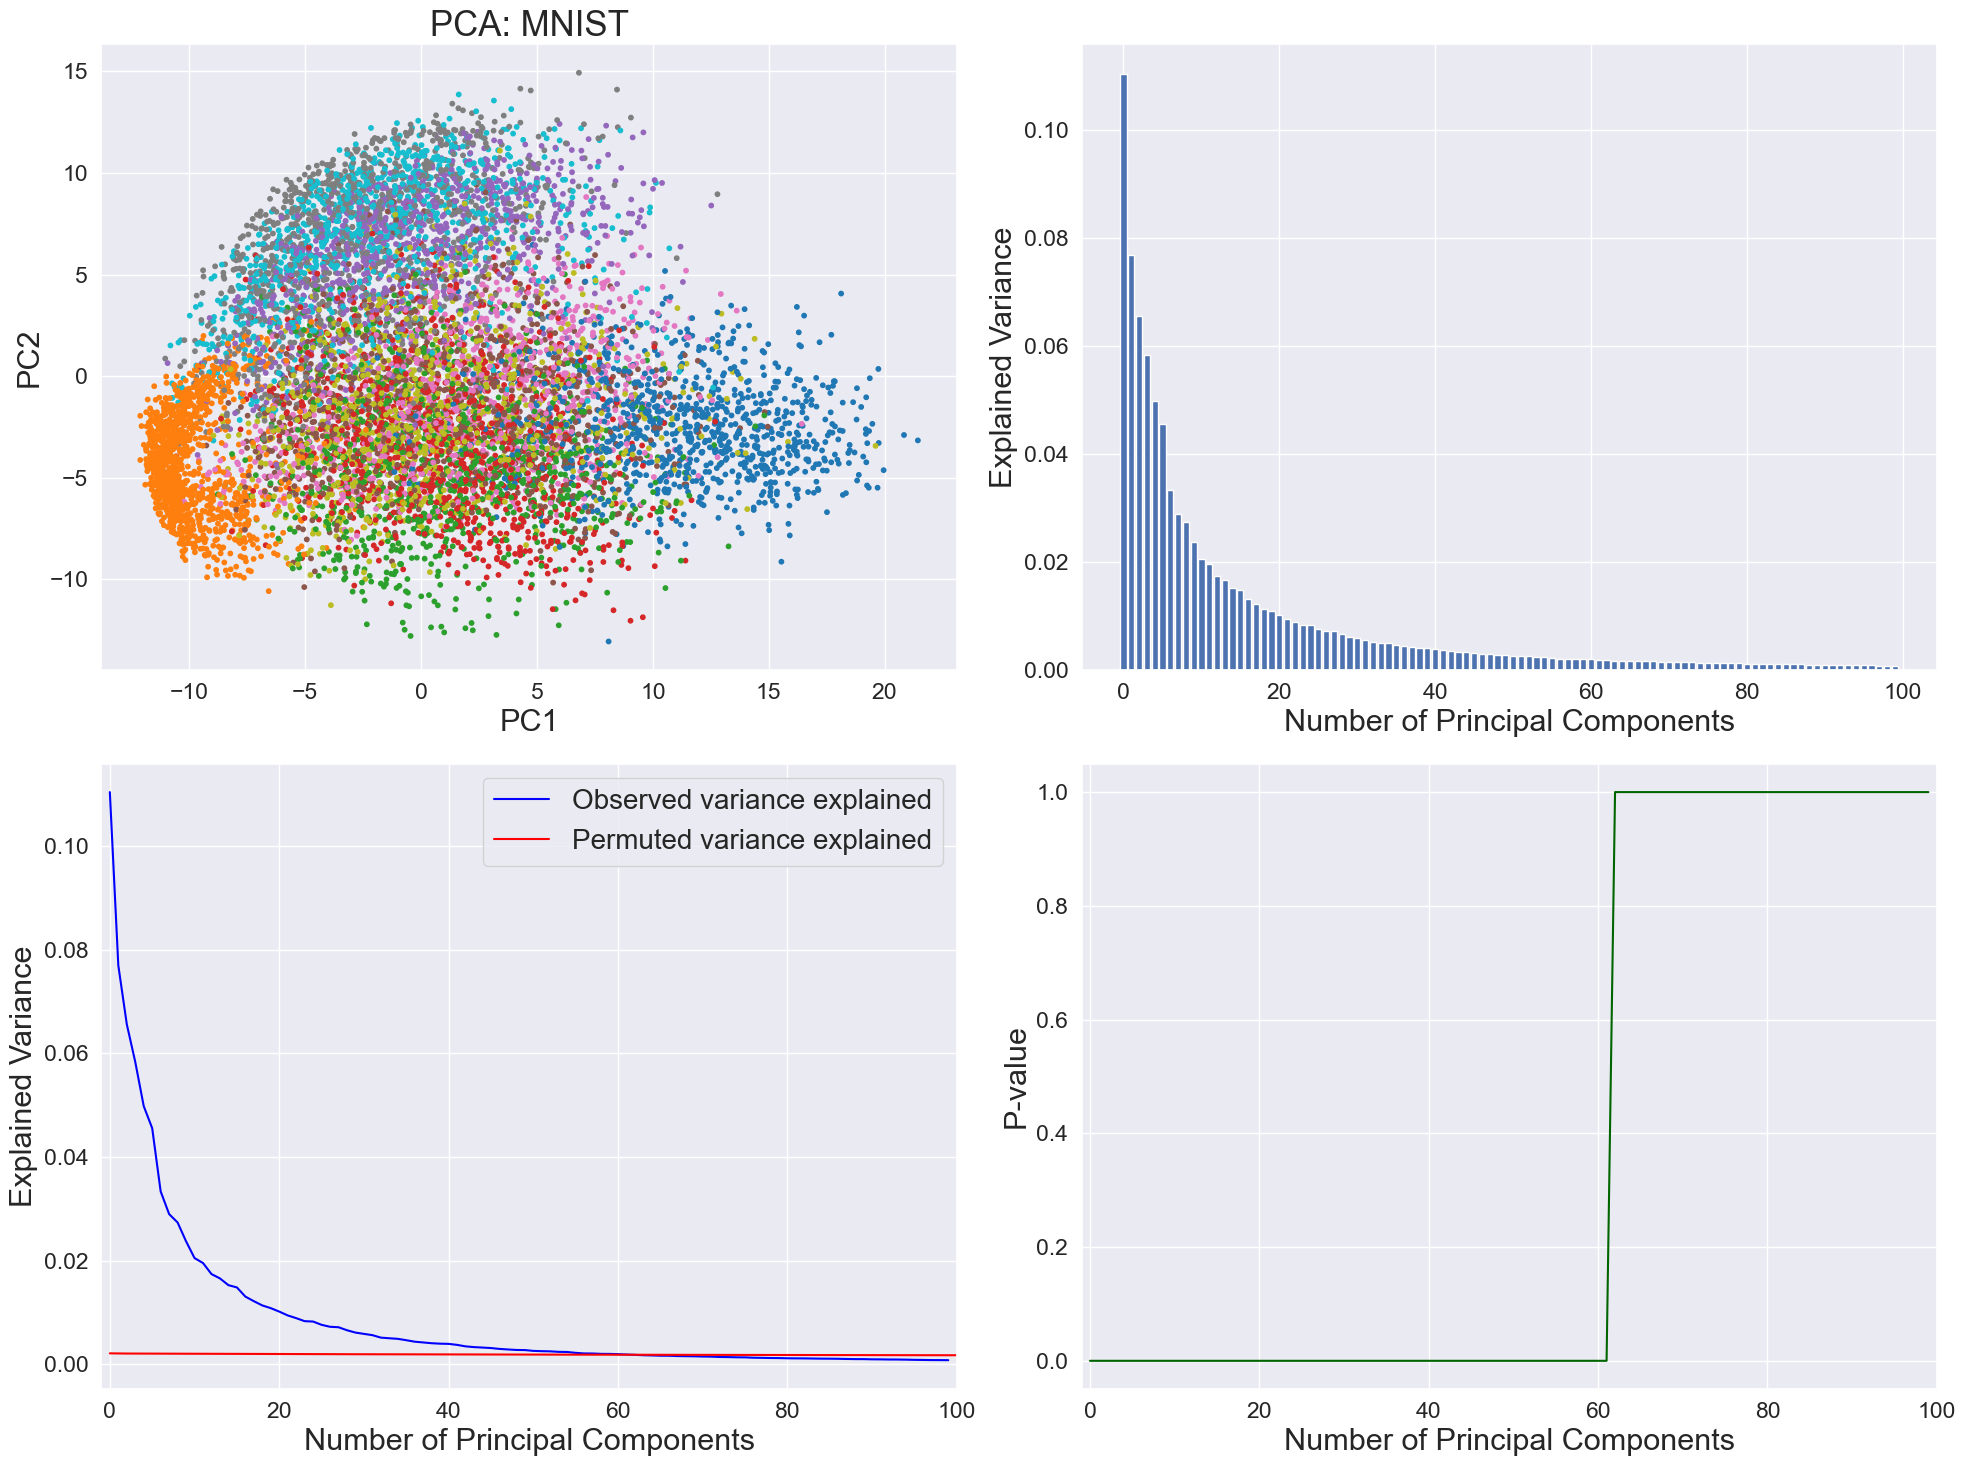

In [7]:
import pandas as pd; import matplotlib.pyplot as plt
from sklearn.decomposition import PCA; import seaborn as sns

N_pca_comps = 100

sns.set(font_scale = 1.5); figure = plt.figure(figsize = (20, 15))

plt.subplot(221)
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=labels, cmap='tab10', s=10)
plt.title('PCA: MNIST', fontsize = 25)
plt.xlabel('PC1', fontsize = 22); plt.ylabel('PC2', fontsize = 22)

plt.subplot(222)
pca = PCA(n_components = N_pca_comps).fit(X)
print('Observed variance explained:')
print(pca.explained_variance_ratio_[0:10]); print('\n')
plt.bar(range(len(pca.explained_variance_ratio_)), 
        pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('Explained Variance', fontsize = 22)

N_perm = 10
X_flat = X.flatten()
expl_var_perm_df = pd.DataFrame(index = list(range(N_perm)), 
                                columns = list(range(X.shape[1])))
for i in range(N_perm):
    np.random.shuffle(X_flat)
    X_perm = X_flat.reshape(X.shape[0], X.shape[1])
    pca_perm = PCA().fit(X_perm)
    expl_var_perm_df.loc[i] = pca_perm.explained_variance_ratio_
    print('Finished {} permutations'.format(i + 1))
    X_perm = list(expl_var_perm_df.mean(axis = 0) + 
                  2*expl_var_perm_df.std(axis = 0)) 

print('\nPermuted variance explained:')
print(X_perm[0:10])

plt.subplot(223)
plt.plot(pca.explained_variance_ratio_, c = 'blue')
plt.plot(X_perm, c = 'red'); plt.xlim([-1, N_pca_comps])
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('Explained Variance', fontsize = 22)
plt.gca().legend(('Observed variance explained', 
                  'Permuted variance explained'), fontsize = 20)

plt.subplot(224)
pval = list()
for j in range(N_pca_comps):
    pval.append(np.sum(expl_var_perm_df.iloc[:, j] + 
                       2*expl_var_perm_df.std(axis = 0) >= 
                       pca.explained_variance_ratio_[j]) / N_perm)
plt.plot(pval, c = 'darkgreen')
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('P-value', fontsize = 22); plt.xlim([-1, N_pca_comps])
N_opt_pcs = np.where(np.array(pval) >= 0.05)[0][0]
print('\nNumber of significant Principal Components: {}'.format(N_opt_pcs))
print('Together they explain {}% of variation in the data'.\
format(int(round(sum(pca.explained_variance_ratio_[0:\
np.where(np.array(pval) >= 0.05)[0][0]])*100,0))))

figure.tight_layout()
plt.show()

In [8]:
import umap.umap_ as umap

/Users/bharathi/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


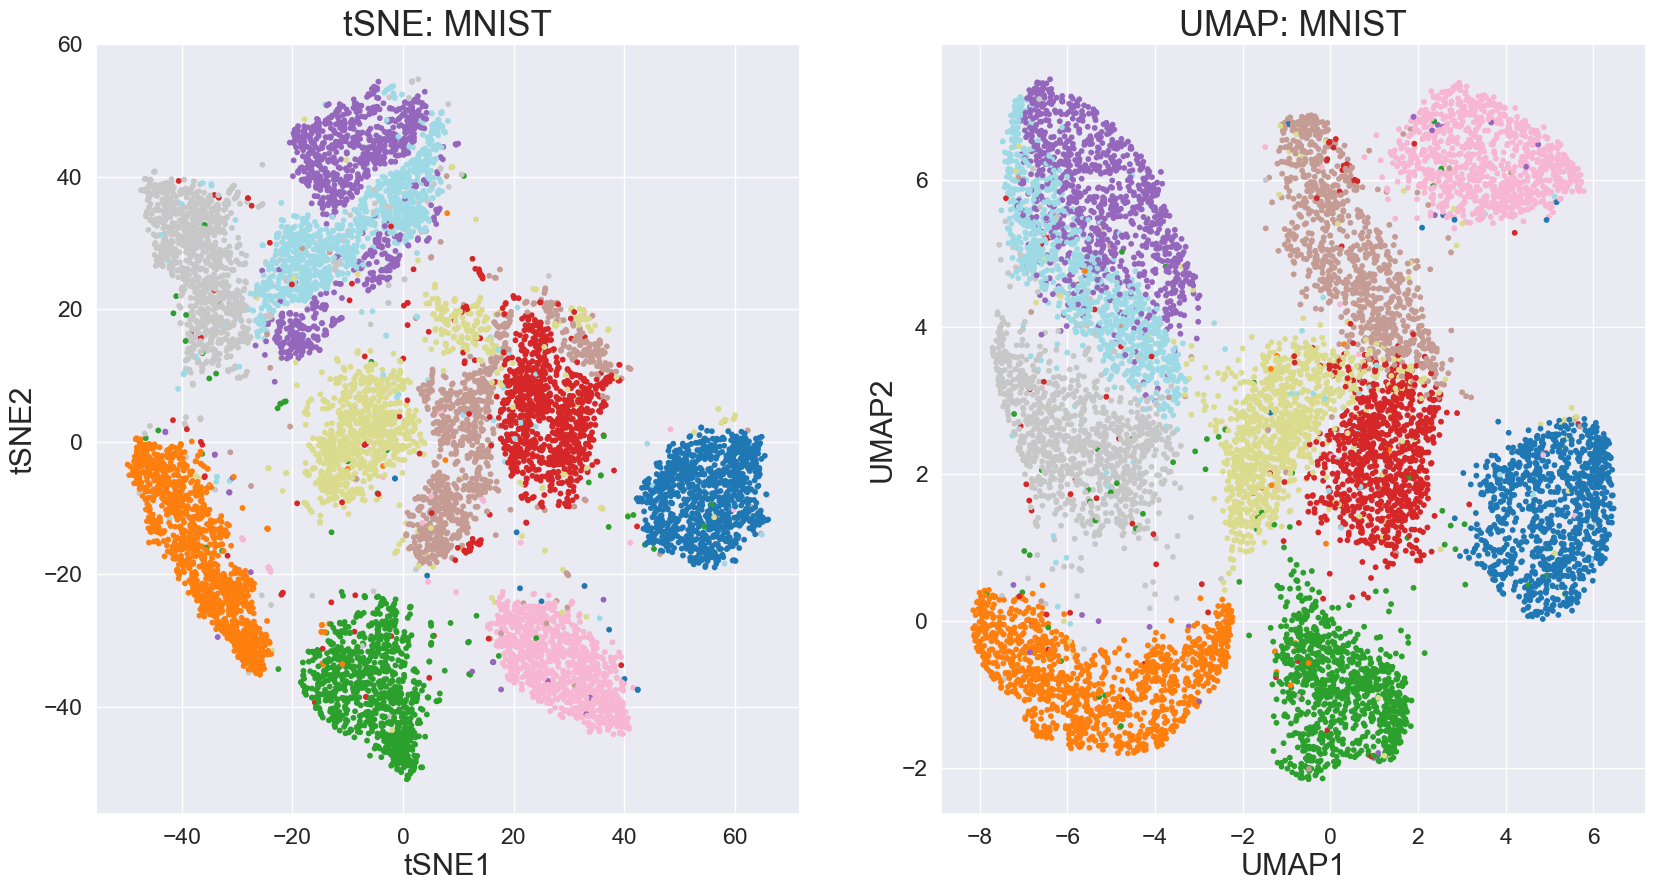

In [9]:
import numpy as np
import seaborn as sns; import matplotlib.pyplot as plt
from sklearn.manifold import TSNE; from sklearn.decomposition import PCA

opt_perp = np.int64(np.round(np.sqrt(X.shape[0]), 0))
X_reduced = PCA(n_components = N_opt_pcs).fit_transform(X)

umap_embedding = umap.UMAP(n_components = 2, n_neighbors = opt_perp, 
                           init = X_reduced[:, 0:2], 
                           min_dist=0.3, n_epochs = 1000, random_state = 123, 
                           verbose = 0).fit_transform(X_reduced)

tsne_embedding = TSNE(n_components=2, perplexity=opt_perp, 
                      init=X_reduced[:, 0:2], 
                      learning_rate = 200, n_iter = 1000, random_state = 123, 
                      verbose = 0).fit_transform(X_reduced)

sns.set(font_scale = 1.5); plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c = labels, s = 10, 
            cmap = 'tab20')
plt.title('tSNE: MNIST', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.subplot(122)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = labels, s = 10, 
            cmap = 'tab20')
plt.title('UMAP: MNIST', fontsize = 25)
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)

plt.show()

In [10]:
import plotly.express as px

In [11]:
opt_perp = np.int64(np.round(np.sqrt(X.shape[0]), 0))
X_reduced = PCA(n_components = N_opt_pcs).fit_transform(X)

umap_embedding = umap.UMAP(n_components = 2, n_neighbors = opt_perp, 
                           init = X_reduced[:, 0:2], 
                           min_dist=0.3, n_epochs = 1000, random_state = 123, 
                           verbose = 0).fit_transform(X_reduced)


fig = px.scatter(d, x=umap_embedding[:, 0], y=umap_embedding[:, 1], color= labels,
                 hover_name= labels, t)
fig.show()
